w = -6.487382, b = 23.445918, cost = 60.503032


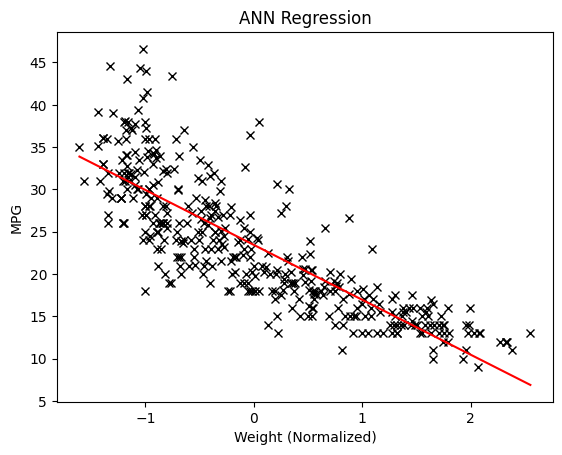

In [1]:
import matplotlib.pyplot as plt
import numpy as np
X_file = np.genfromtxt('mpg.csv', delimiter=',', skip_header=1)
N = np.shape(X_file)[0]


def F(w, x, b):
    return w*x+b

def grad_b(w,b, yht,x,y): # Derivative wrt b
    return (-(y - yht))

def grad_w(w,b, yht,x,y): # Derivative wrt w
    return (-(y - yht)*(x))

def error(y_pred, y_true):
    return (0.5*(y_pred-y_true)**2)

def Perceptron_gradient_descent():
    w, b, eta, loss= init_w, init_b, 0.001, 0
    params = []
    for i in range(1, max_iter+1):
        dw, db, eerr_term = 0, 0, 0
        for x,y in zip(X,Y):
            yht = F(w, x, b)
            dw += grad_w(w,b, yht,x,y)
            db += grad_b(w,b, yht,x,y)
            eerr_term += error(yht, y)
        loss = np.sqrt(eerr_term)
        w -= eta * dw
        b -= eta * db
        params.append((w, b, loss))
       # print("after w ",w," ","after ",b)
    p = params[-1]
    print(f'w = {p[0]:f}, b = {p[1]:f}, cost = {p[2]:f}')
    return np.array(params)

X, Y = X_file[:,4], X_file[:,0]

# it is a good idea to normalize the data

X = (X-np.mean(X))/np.std(X)
#Y = (Y-np.mean(Y))/np.std(Y)


init_w = 0
init_b = 0
max_iter = 100


params = Perceptron_gradient_descent()
p = params[-1]

# Plot the data and best fit line
tt = np.linspace(np.min(X), np.max(X), 10)
bf_line = p[1]+p[0]*tt

plt.plot(X, Y, 'kx', tt, bf_line, 'r-')
plt.xlabel('Weight (Normalized)')
plt.ylabel('MPG')
plt.title('ANN Regression')

#plt.savefig('mpg.png')

plt.show()